1


[0.16069159 0.6441982 ]
3.2065342979726124
[ 2.40124376 -1.6496606 ]
2.8244952771865974
[-0.74676427 -2.03055365]
2.7418495429582266
[2.6452996  1.80370754]
1.8230923574671767
[1.94816658 0.11623487]


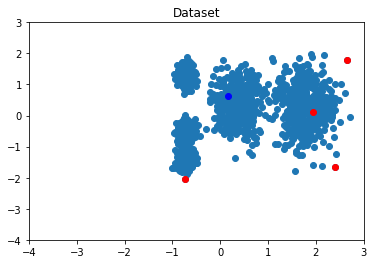

In [21]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import math
from sklearn.datasets import make_blobs

    

def fit(self, X, k, n_init, max_iter=300, tol=1e-4, distance_metric="euclidean"):
    
    #K-Means++ ************
    
    #d = [0.0 for _ in range(len(X))]
    #print(d)
    random = X[np.random.randint(X.shape[0], size=1), :]
    #print(random)
    centroids = np.array(random)
    #np.append(centroids, random)
    #print(centroids)
    plt.scatter(centroids[:,0], centroids[:,1],  
                color = 'blue', zorder=10)
    
    print(centroids[0]);
    
    for a in range(k-1):
        farthestDist = 0
        for b in range(X.shape[0]):
            closestDistToCentroid = math.inf
            for c in range(centroids.shape[0]): 
                distanceToACentroid = np.linalg.norm(X[b,:]-centroids[c,:])
                if closestDistToCentroid > distanceToACentroid:
                    closestDistToCentroid = distanceToACentroid
                    closestCentroid = centroids[c,:]
            
            distToClosestCentroid = np.linalg.norm(X[b,:]-closestCentroid)
            if distToClosestCentroid > farthestDist:
                farthestDist = distToClosestCentroid
                farthestPoint = X[b,:]
                #print(dist)
                #print(centroids[c,:])
                #print(X[j,:])
                
        print(farthestDist)
        print(farthestPoint)
        
        centroids = np.vstack([centroids, farthestPoint])
        #farthestPoint = np.delete(farthestPoint, 1)
        plt.scatter(farthestPoint[0], farthestPoint[1],  color = 'red', zorder=10)
        
    #END K-Means++ ************
    
    #K-Means Assignment step **************
    closestCentroidArray = np.zeros(shape=(X.shape[0],2))
   
    for a in range(X.shape[0]):
        closestDistToCentroid = math.inf
        for b in range(centroids.shape[0]): 
            distanceToACentroid = np.linalg.norm(X[a,:]-centroids[b,:])
            if closestDistToCentroid > distanceToACentroid:
                closestDistToCentroid = distanceToACentroid
                closestCentroid = centroids[b,:]
        closestCentroidArray[a] = closestCentroid
        
    
    #print(closestCentroidArray)
        
        
        
    
        
    X1 = X[:,0]
    X2 = X[:,1]
    
    plt.plot() 
    plt.xlim([-4, 3]) 
    plt.ylim([-4, 3]) 
    plt.title('Dataset') 
    plt.scatter(X1, X2) 
    plt.show() 
    #print(X)
    
    
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])


blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

#all_data = pd.read_csv('/Users/crystalwarta/Downloads/movies_metadata.csv')

#all_data = all_data.dropna()

#all_data.drop(all_data[all_data['vote_count'] <= 30 ].index, inplace=True)

#my_data = all_data[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']].copy()
#my_data = all_data[['budget', 'popularity']].copy()

#col_names = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
#col_names = ['budget', 'popularity']

scaler = StandardScaler()



X = scaler.fit_transform(X)

#X = my_data.to_numpy()

#print(X)

fit(1, X, 5, 4)


